# Torch

### Import Libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

### Loading Data

In [2]:
data = pd.read_csv("data_3_1_2.csv")

In [3]:
data.head()

,x1,x2,class
0,9.076,3.721,0
1,6.809,3.930,0
2,8.256,2.851,1
3,8.461,3.145,1
4,6.783,3.188,1


In [4]:
data.shape

(200, 3)

### Visualizing Data

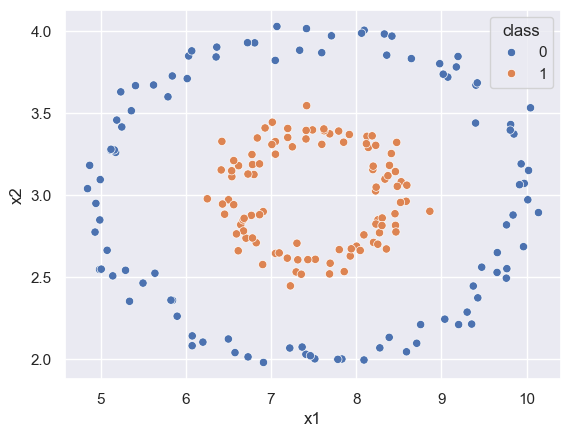

In [5]:
sns.scatterplot(x='x1', y='x2', hue='class', data=data)
plt.show()

### Splitting X and y

In [6]:
data_arr = data.to_numpy()
X = data_arr[:, :-1]
y = data_arr[:, -1]

### Splitting Training and Test set

In [7]:
X_train = X[:120]
y_train = y[:120]
X_test = X[120:]
y_test = y[120:]

In [8]:
print(X_train.shape)

(120, 2)


### visualize training set

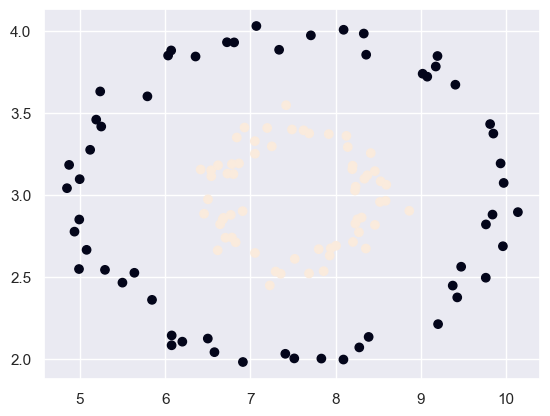

In [9]:
plt.scatter(X_train[:,0], X_train[:,1], c=y_train)
plt.show()

### Visualizing Test set

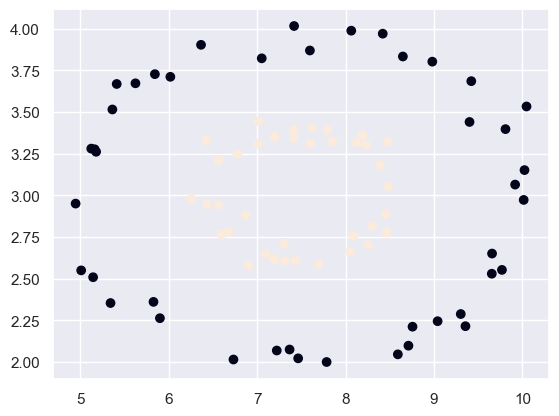

In [10]:
plt.scatter(x=X_test[:, 0], y=X_test[:, 1], c=y_test)
plt.show()

### Feature Scaling

In [11]:
def scale(X):
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    X_scaled = (X - mean) / std
    return X_scaled, mean, std

X_train, mean, std = scale(X_train)
X_test = (X_test - mean) / std
print(X_train[:5])
print(X_test[:5])

[[ 1.20308374  1.39928397]
 [-0.48853125  1.79822043]
 [ 0.59120713 -0.26136065]
 [ 0.74417628  0.2998227 ]
 [-0.50793221  0.38190054]]
[[-0.58628227 -0.39115816]
 [-0.20274009 -0.70801679]
 [-0.18110055 -1.75403201]
 [ 1.83137656  0.14711975]
 [-1.16756505 -1.38372735]]


### Convert to Tensor

In [ ]:
import torch

tX_train = torch.tensor(X_train, dtype=torch.float32)
ty_train = torch.tensor(y_train, dtype=torch.float32)
tX_test = torch.tensor(X_test, dtype=torch.float32)
ty_test = torch.tensor(y_test, dtype=torch.float32)

### Concate X

In [22]:
tX_train_new = torch.cat ((torch.ones(len(tX_train), 1), tX_train, tX_train**2), dim=1)
tX_train_new[:5]

tensor([[ 1.0000,  1.2031,  1.3993,  1.4474,  1.9580],
        [ 1.0000, -0.4885,  1.7982,  0.2387,  3.2336],
        [ 1.0000,  0.5912, -0.2614,  0.3495,  0.0683],
        [ 1.0000,  0.7442,  0.2998,  0.5538,  0.0899],
        [ 1.0000, -0.5079,  0.3819,  0.2580,  0.1458]])

### Modeling

hypothesis: $h(x)=\theta_0+\theta_1x_1+\theta_2x_2+\theta_3x_1^2+\theta_4x_2^2$ where: $g(x)=\frac{1}{1+e^{-z}}$

In [19]:
def model1(X, theta):
    return torch.sigmoid(torch.matmul(X, theta))

In [30]:
import torch.nn as nn
import torch.optim as optim

theta = torch.zeros((5, 1), dtype=torch.float32, requires_grad=True)
cost_func = nn.BCELoss()
optimizer = optim.SGD([theta], lr=10)

for i in range(500):
    h = model1(tX_train_new, theta)
    cost = cost_func(h, ty_train.view(-1, 1))
    cost.backward()
    optimizer.step()
    optimizer.zero_grad()
    print(f"Epoch: {i+1:03d} Cost: {cost:.4f}")

Epoch: 001 Cost: 0.6931
Epoch: 002 Cost: 1.0138
Epoch: 003 Cost: 0.0503
Epoch: 004 Cost: 0.0342
Epoch: 005 Cost: 0.0306
Epoch: 006 Cost: 0.0281
Epoch: 007 Cost: 0.0260
Epoch: 008 Cost: 0.0243
Epoch: 009 Cost: 0.0227
Epoch: 010 Cost: 0.0214
Epoch: 011 Cost: 0.0202
Epoch: 012 Cost: 0.0192
Epoch: 013 Cost: 0.0183
Epoch: 014 Cost: 0.0174
Epoch: 015 Cost: 0.0167
Epoch: 016 Cost: 0.0160
Epoch: 017 Cost: 0.0153
Epoch: 018 Cost: 0.0147
Epoch: 019 Cost: 0.0142
Epoch: 020 Cost: 0.0137
Epoch: 021 Cost: 0.0132
Epoch: 022 Cost: 0.0128
Epoch: 023 Cost: 0.0124
Epoch: 024 Cost: 0.0120
Epoch: 025 Cost: 0.0116
Epoch: 026 Cost: 0.0113
Epoch: 027 Cost: 0.0110
Epoch: 028 Cost: 0.0107
Epoch: 029 Cost: 0.0104
Epoch: 030 Cost: 0.0101
Epoch: 031 Cost: 0.0099
Epoch: 032 Cost: 0.0097
Epoch: 033 Cost: 0.0094
Epoch: 034 Cost: 0.0092
Epoch: 035 Cost: 0.0090
Epoch: 036 Cost: 0.0088
Epoch: 037 Cost: 0.0086
Epoch: 038 Cost: 0.0084
Epoch: 039 Cost: 0.0083
Epoch: 040 Cost: 0.0081
Epoch: 041 Cost: 0.0079
Epoch: 042 Cost:

### Model Evaluation

In [72]:
h = model1(tX_train_new, theta)
h = h.reshape(-1, )
y_hat = torch.clone(ty_train)
y_hat[h>=0.5] == 1
y_hat[h<0.5] == 0
accuracy = (y_hat==ty_train).sum().item()/ty_train.size(0)
print(f"Accuracy of Model 1 is: {accuracy*100:.2f}")

Accuracy of Model 1 is: 100.00


In [75]:
tX_test_new = torch.cat((torch.ones(len(tX_test), 1), tX_test, tX_test**2), dim=1)
h1 = model1(tX_test_new, theta)
h1 = h1.reshape(-1, )
y_pred = torch.clone(ty_test)
y_pred[h1>=0.5] == 1
y_pred[h1<0.5] == 0

TP = ((y_hat==1) & (ty_train==1)).int().sum()
FP = ((y_hat==1) & (ty_train==0).int()).sum()
FN = ((y_hat==0) & (ty_train==1).int()).sum()
TN = ((y_hat==0) & (ty_train==0).int()).sum()

Precision = TP / (FP + TP)
Recall = TP / (TP + FN)
F_score = 2 * Precision * Recall / (Precision + Recall)
accuracy_1 = (TP+TN) / (TP+FP+FN+TN)


print(f"Precision: {Precision:.2f}")
print(f"Recall: {Recall:.2f}")
print(f"F_score: {F_score:.2f}")
print(f"accuracy of Test set: {accuracy_1:.2f}")

Precision: 1.00
Recall: 1.00
F_score: 1.00
accuracy of Test set: 1.00


# Neural Network

In [80]:
def model(X, w1, b1, w2, b2, w3, b3):
    a1 = torch.sigmoid(torch.matmul(X, w1)+b1)
    a2 = torch.sigmoid(torch.matmul(a1, w2)+b2)
    output = torch.sigmoid(torch.matmul(a2, w3)+b3)
    return output

In [102]:
w1 = torch.randn((2, 5), dtype=torch.float32, requires_grad=True)
b1 = torch.randn((1, 5), dtype=torch.float32, requires_grad=True)
w2 = torch.randn((5, 5), dtype=torch.float32, requires_grad=True)
b2 = torch.randn((1, 5), dtype=torch.float32, requires_grad=True)
w3 = torch.randn((5, 1), dtype=torch.float32, requires_grad=True)
b3 = torch.randn((1, 1), dtype=torch.float32, requires_grad=True)

cost_func1 = nn.BCELoss()
optimizer1 = optim.SGD([w1, b1, w2, b2, w3, b3], lr=10)
cost1_list = []

for epoch in range(500):
    h1 = model(tX_train, w1, b1, w2, b2, w3, b3)
    cost1 = cost_func1(h1, ty_train.view(-1, 1))
    cost1.backward()
    optimizer1.step()
    optimizer1.zero_grad()
    cost1_list.append(cost1)
    print(f"Epoch :{epoch+1:03d} Cost: {cost1:.4f}")

Epoch :001 Cost: 1.0444
Epoch :002 Cost: 4.2471
Epoch :003 Cost: 1.6164
Epoch :004 Cost: 0.8923
Epoch :005 Cost: 0.9951
Epoch :006 Cost: 1.0112
Epoch :007 Cost: 1.0723
Epoch :008 Cost: 1.0223
Epoch :009 Cost: 1.0756
Epoch :010 Cost: 1.0203
Epoch :011 Cost: 1.0739
Epoch :012 Cost: 1.0187
Epoch :013 Cost: 1.0726
Epoch :014 Cost: 1.0176
Epoch :015 Cost: 1.0718
Epoch :016 Cost: 1.0168
Epoch :017 Cost: 1.0714
Epoch :018 Cost: 1.0162
Epoch :019 Cost: 1.0711
Epoch :020 Cost: 1.0158
Epoch :021 Cost: 1.0711
Epoch :022 Cost: 1.0155
Epoch :023 Cost: 1.0713
Epoch :024 Cost: 1.0154
Epoch :025 Cost: 1.0717
Epoch :026 Cost: 1.0153
Epoch :027 Cost: 1.0722
Epoch :028 Cost: 1.0153
Epoch :029 Cost: 1.0728
Epoch :030 Cost: 1.0154
Epoch :031 Cost: 1.0737
Epoch :032 Cost: 1.0155
Epoch :033 Cost: 1.0747
Epoch :034 Cost: 1.0157
Epoch :035 Cost: 1.0759
Epoch :036 Cost: 1.0159
Epoch :037 Cost: 1.0773
Epoch :038 Cost: 1.0161
Epoch :039 Cost: 1.0789
Epoch :040 Cost: 1.0163
Epoch :041 Cost: 1.0807
Epoch :042 Cost:

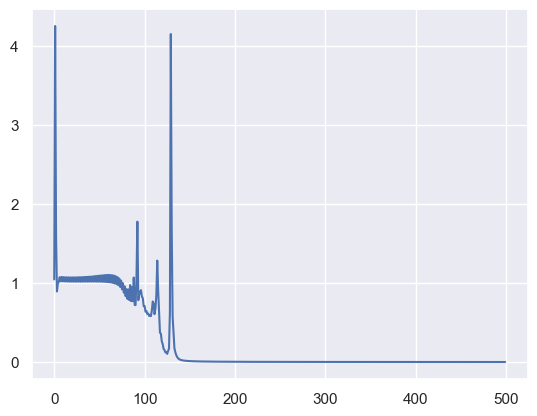

In [103]:
plt.plot(torch.tensor(cost1_list).detach().numpy())
plt.show()

### Model Evaluation

In [118]:
h1 = model(tX_train, w1, b1, w2, b2, w3, b3)
h1 = h1.reshape(-1, )
y_hat1 = torch.clone(ty_train)
y_hat1[h1>=0.5] == 1
y_hat1[h1<0.5] == 0

TP = ((y_hat1==1) & (ty_train==1)).int().sum()
FP = ((y_hat1==1) & (ty_train==0)).int().sum()
TN = ((y_hat1==0) & (ty_train==0)).int().sum()
FN = ((y_hat1==0) & (ty_train==1)).int().sum()

Precision_nn = TP / (TP+FP)
Recall_nn = TP / (TP+FN)
F_score_nn = 2*Precision_nn*Recall_nn / (Precision_nn+Recall_nn)
Accuracy_nn = (y_hat1 == ty_train).int().sum()/len(ty_train)

print(f"Precision: {Precision_nn}")
print(f"Recall: {Recall_nn}")
print(f"F_score: {F_score_nn}")
print(f"Accuracy: {Accuracy_nn}")

Precision: 1.0
Recall: 1.0
F_score: 1.0
Accuracy: 1.0


In [120]:
th1 = model(tX_test, w1, b1, w2, b2, w3, b3)
th1 = th1.reshape(-1, )
ty_hat1 = torch.clone(ty_test)
ty_hat1[th1>=0.5] == 1
ty_hat1[th1<0.5] == 0

TP = ((ty_hat1==1) & (ty_test==1)).int().sum()
FP = ((ty_hat1==1) & (ty_test==0)).int().sum()
TN = ((ty_hat1==0) & (ty_test==0)).int().sum()
FN = ((ty_hat1==0) & (ty_test==1)).int().sum()

Precision_nn = TP / (TP+FP)
Recall_nn = TP / (TP+FN)
F_score_nn = 2*Precision_nn*Recall_nn / (Precision_nn+Recall_nn)
Accuracy_nn = (y_hat1 == ty_train).int().sum()/len(ty_train)

print(f"Precision: {Precision_nn}")
print(f"Recall: {Recall_nn}")
print(f"F_score: {F_score_nn}")
print(f"Accuracy: {Accuracy_nn}")

Precision: 1.0
Recall: 1.0
F_score: 1.0
Accuracy: 1.0
